In [7]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

Dibuja curvas S para un valor de U dado 

In [2]:
# tiempo de muestreo [segundos]
Ts = 0.2
U = 0.2

In [3]:
N = 200
x     = np.zeros((N,1), dtype=float)
x_dot = np.zeros((N,1), dtype=float)
x_req = np.zeros((N,1), dtype=float)
u = np.zeros((N,1), dtype=float)

In [4]:
# obtiene el valor de K dado x0, U
def get_K(x0, u):
    K = np.sqrt(u/(2*x0))
    return K

In [5]:
x0_base = 1
K = get_K(x0_base, U)
print('----------')
print('x0 = {:.3f}'.format(x0_base))
print('U  = {:.3f}'.format(U))
print('K  = {:.3f}'.format(K))
print('----------')

----------
x0 = 1.000
U  = 0.200
K  = 0.316
----------


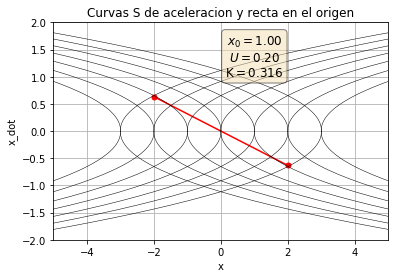

In [6]:
# Curvas    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Curvas S de aceleracion y recta en el origen')
ax.set_xlabel('x')
plt.ylabel('x_dot')
plt.grid()
# plt.xlim([0, 1])

# pinta recta
x0 = x0_base
pto1 = (2*x0,-K*2*x0)
plt.plot(pto1[0], pto1[1], 'ro', markersize=5)

plt.plot(-pto1[0], -pto1[1], 'ro', markersize=5)

plt.plot([pto1[0], -pto1[0]], [pto1[1], -pto1[1]], 'r-', markersize=5)

# pinta curvas U
U_list = [-U, U]
x0_list = [0, 1, -1, 2, -2, 3 , -3]
signo_list = [1,-1]

for signo in signo_list:
    for u in U_list:
        for x0 in x0_list:
            # condicion inicial 
            x[0] = x0
            for k in range(0, x.size-1):
                x[k+1]     = x[k]     + signo* x_dot[k]*Ts;
                x_dot[k+1] = x_dot[k] + u*Ts;
            plt.plot(x,x_dot,'k', linewidth=0.5)


plt.xlim(-5, 5)
plt.ylim(-2, 2)


# place a text box in upper left in axes coords
textstr = '\n'.join((
    r'$x_0=%.2f$' % (x0_base, ),
    r'$U=%.2f$' % (U, ),
    r'$\mathrm{K}=%.3f$' % (K, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.60, 0.95, textstr, fontsize=12,        
         transform=ax.transAxes, 
         verticalalignment='top', 
         horizontalalignment='center',          bbox=props)

plt.draw()
plt.savefig('curvas_u.png')